In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
app_train = pd.read_csv('../data/processed/home_credit_train_ready.csv')

print(app_train.shape)

app_train.head()

(252137, 327)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,approval_ext,prev_apps_log,experience_score,cc_util_ext,cc_util_risk,good_behavior_score,good_behavior_ext,net_score,net_score_ext,final_score
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.000000,0.693147,0.112142,0.0,0.0,0.010417,0.002739,-0.139959,-0.036802,0.401607
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.000000,1.386294,0.662424,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.543228
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.000000,0.693147,0.412533,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.618064
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.278761,2.302585,1.266761,0.0,0.0,0.142857,0.092920,0.100198,0.065173,0.612671
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.000000,1.945910,0.857977,0.0,0.0,0.000000,0.000000,-0.036797,-0.011876,0.523104


In [4]:
app_train.isnull().sum().sort_values(ascending=False).head(55)

bureau_debt_acceleration        230492
bureau_overdue_last_3m          220450
bureau_overdue_last_6m          183020
OWN_CAR_AGE                     157724
EXT_SOURCE_1                    130861
recent_overdue_mean              78667
EXT_SOURCE_3                     49896
OCCUPATION_TYPE                  41019
bureau_credit_sum                35661
bureau_sold_count                35660
bureau_prolongation_ratio        35660
bureau_weighted_credit           35660
bureau_bad_debt_count            35660
bureau_weighted_debt             35660
bureau_weighted_overdue          35660
bureau_weighted_active_ratio     35660
bureau_debt_to_income            35660
bureau_debt_ratio_ext            35660
bureau_max_overdue_to_income     35660
bureau_days_credit_mean          35660
bureau_days_credit_min           35660
bureau_credit_active             35660
bureau_prolongation_count        35660
active_debt_sum                  35660
active_overdue_sum               35660
AMT_REQ_CREDIT_BUREAU_HOU

In [5]:
app_train["TARGET"].value_counts(normalize=True)

TARGET
0    0.9134
1    0.0866
Name: proportion, dtype: float64

In [6]:
categorical_cols = app_train.select_dtypes(include=["object"]).columns
numerical_cols = app_train.select_dtypes(exclude=["object"]).columns

print("Categóricas:", len(categorical_cols))
print("Numéricas:", len(numerical_cols))

Categóricas: 12
Numéricas: 315


ANÁLISIS DEL TARGET

Distribución del TARGET:
  0 (Pagó bien): 230,302 (91.34%)
  1 (Dificultades): 21,835 (8.66%)

⚠️  DATASET DESBALANCEADO - Ratio: 10.5:1


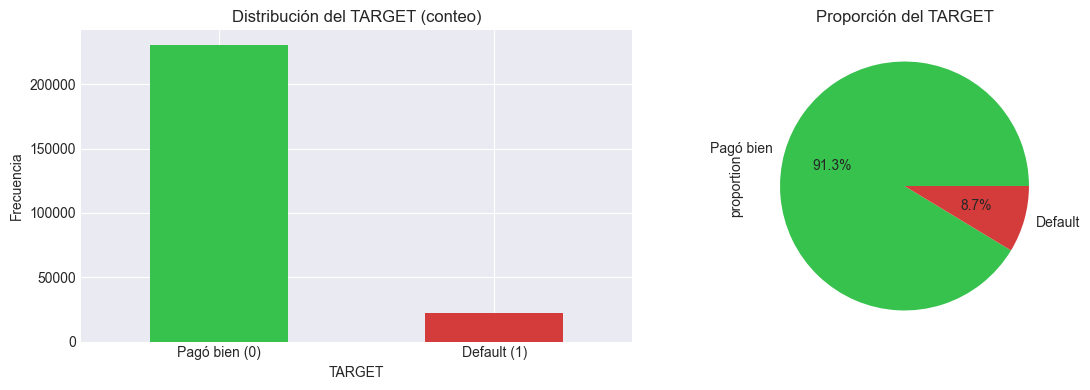

In [ ]:
# ============================
# Configuración de estilo
# ============================
plt.style.use('seaborn-v0_8-darkgrid')

# Paleta personalizada para ambos gráficos
colores = ["#37C24E", "#D43B3B"]   # Azul = TARGET 0, Naranja = TARGET 1
sns.set_palette(colores)

# ============================
# Cálculo de estadísticas
# ============================
target_counts = app_train['TARGET'].value_counts()
target_pct = app_train['TARGET'].value_counts(normalize=True) * 100

print("="*80)
print("ANÁLISIS DEL TARGET")
print("="*80)
print(f"\nDistribución del TARGET:")
print(f"  0 (Pagó bien): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"  1 (Dificultades): {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"\n⚠️  DATASET DESBALANCEADO - Ratio: {target_pct[0]/target_pct[1]:.1f}:1")

# ============================
# Visualización del TARGET
# ============================
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# --- Gráfico de barras ---
app_train['TARGET'].value_counts().plot(
    kind='bar',
    ax=ax[0],
    color=colores
)
ax[0].set_title('Distribución del TARGET (conteo)')
ax[0].set_xlabel('TARGET')
ax[0].set_ylabel('Frecuencia')
ax[0].set_xticklabels(['Pagó bien (0)', 'Default (1)'], rotation=0)

# --- Gráfico de pastel ---
app_train['TARGET'].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',
    ax=ax[1],
    colors=colores,
    labels=['Pagó bien', 'Default']
)
ax[1].set_title('Proporción del TARGET')
plt.tight_layout()
plt.show()



ANÁLISIS DE EXT_SOURCE

EXT_SOURCE_1:
  Missing: 130861 (51.9%)
  Range: [0.0146, 0.9444]
  Mean No Default: 0.4912
  Mean Default: 0.3717
  Correlación con TARGET: -0.1553

EXT_SOURCE_2:
  Missing: 504 (0.2%)
  Range: [0.0000, 0.8550]
  Mean No Default: 0.5261
  Mean Default: 0.4110
  Correlación con TARGET: -0.1705

EXT_SOURCE_3:
  Missing: 49896 (19.8%)
  Range: [0.0005, 0.8940]
  Mean No Default: 0.5110
  Mean Default: 0.3835
  Correlación con TARGET: -0.1798


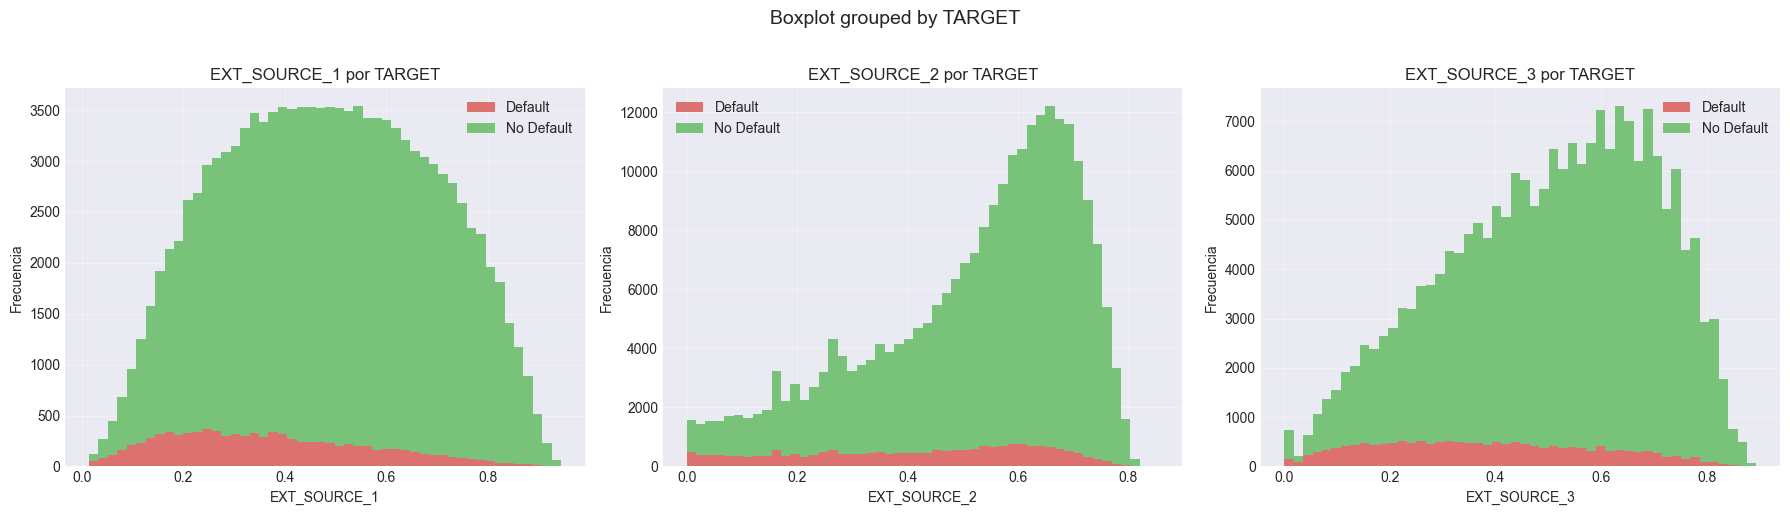

In [8]:
print("\n" + "="*80)
print("ANÁLISIS DE EXT_SOURCE")
print("="*80)

ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# Crear figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Boxplot grouped by TARGET', fontsize=14, y=1.02)

for idx, col in enumerate(ext_sources):
    ax = axes[idx]
    
    # Filtrar datos por TARGET
    no_default = app_train[app_train['TARGET'] == 0][col].dropna()
    default = app_train[app_train['TARGET'] == 1][col].dropna()
    
    # Crear histogramas apilados (Default abajo, No Default arriba)
    ax.hist([default, no_default], 
            bins=50, 
            stacked=True,
            color=['#d9534f', '#5cb85c'],
            label=['Default', 'No Default'],
            alpha=0.8)
    
    ax.set_title(f'{col} por TARGET')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Estadísticas
    print(f"\n{col}:")
    print(f"  Missing: {app_train[col].isnull().sum()} ({app_train[col].isnull().sum()/len(app_train)*100:.1f}%)")
    print(f"  Range: [{app_train[col].min():.4f}, {app_train[col].max():.4f}]")
    print(f"  Mean No Default: {no_default.mean():.4f}")
    print(f"  Mean Default: {default.mean():.4f}")
    
    # Correlación con TARGET
    corr = app_train[[col, 'TARGET']].corr().iloc[0, 1]
    print(f"  Correlación con TARGET: {corr:.4f}")

plt.tight_layout()
plt.show()

Durante el análisis exploratorio, detectamos que la variable AMT_INCOME_TOTAL (ingresos totales al año) presentaba valores extremos que podían distorsionar las métricas estadísticas, especialmente la media. Para mitigar este efecto sin eliminar datos, aplicamos winsorización, que consiste en limitar los valores superiores (en este caso, por encima del percentil 99) a un umbral máximo.

Esta técnica permite:

* Reducir el impacto de outliers sin eliminar observaciones.

* Preservar la media y la distribución general de la variable.

* Evitar sesgos en modelos estadísticos que son sensibles a valores extremos.

In [9]:
app_train["AMT_INCOME_TOTAL"].describe()

count    252137.000000
mean     172673.001234
std       83932.565507
min       25650.000000
25%      112500.000000
50%      157500.000000
75%      211500.000000
max      472500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

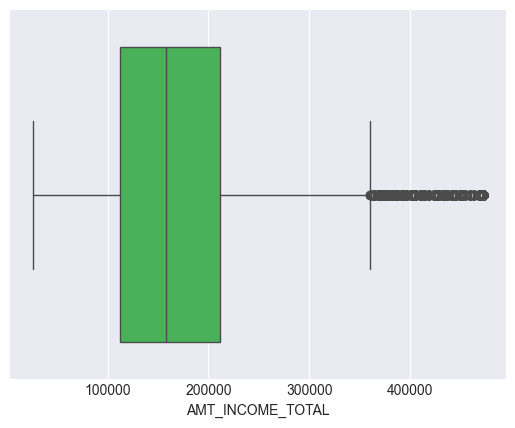

In [10]:
sns.boxplot(x=app_train["AMT_INCOME_TOTAL"])
plt.show()

C:\Users\Agu\AppData\Local\Temp\ipykernel_26904\1648862288.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df_temp.groupby("intervalo")[target_col].mean().reset_index()


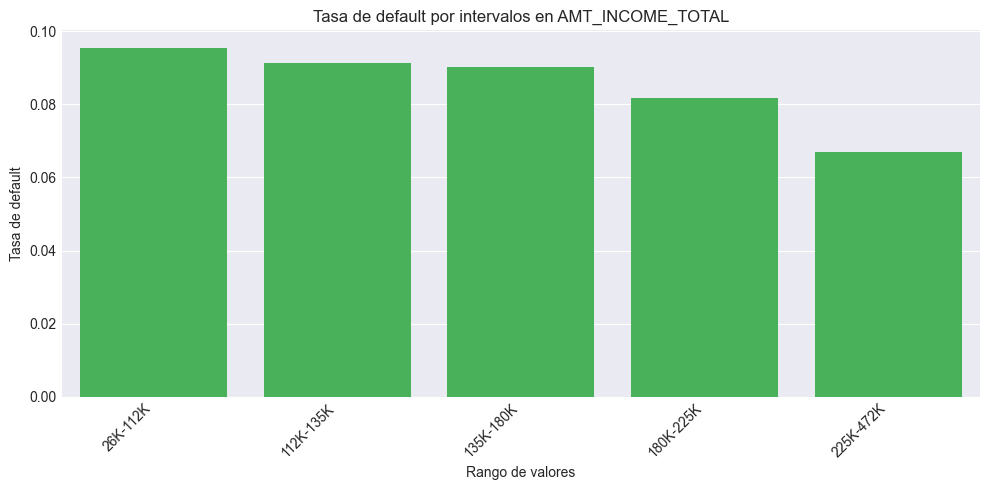

C:\Users\Agu\AppData\Local\Temp\ipykernel_26904\1648862288.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df_temp.groupby("intervalo")[target_col].mean().reset_index()


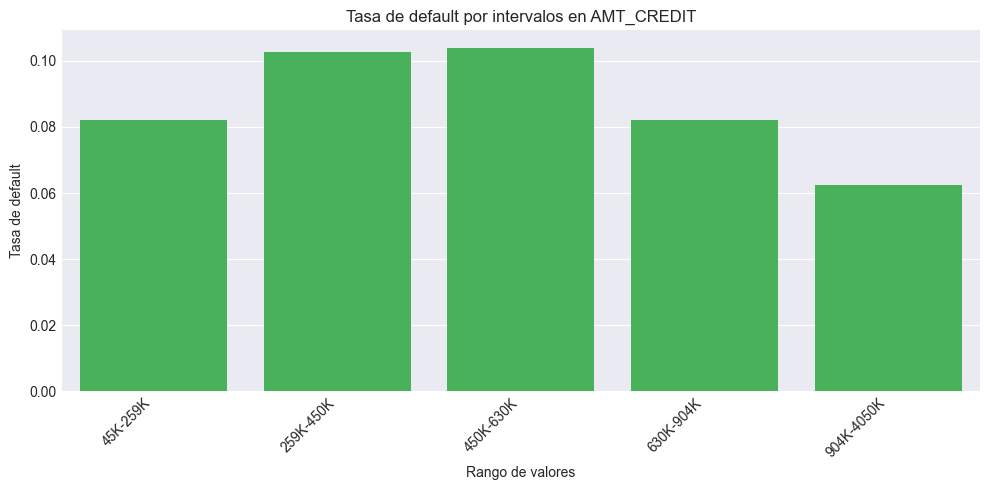

C:\Users\Agu\AppData\Local\Temp\ipykernel_26904\1648862288.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df_temp.groupby("intervalo")[target_col].mean().reset_index()


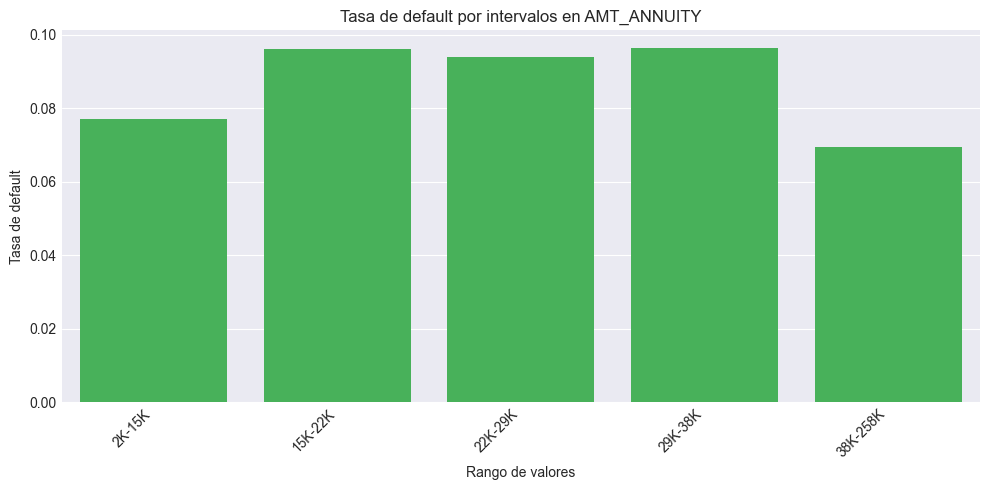

In [11]:
def graficar_numericas_vs_target(app_train, columnas_numericas, target_col="TARGET", bins=5):
    for col in columnas_numericas:
        if col in app_train.columns:
            df_temp = app_train[[col, target_col]].copy().dropna()
            df_temp["intervalo"] = pd.qcut(df_temp[col], q=bins, duplicates="drop")
            
            tabla = df_temp.groupby("intervalo")[target_col].mean().reset_index()
            
            # Crear etiquetas con valores redondeados
            etiquetas = []
            for intervalo in tabla['intervalo']:
                left = intervalo.left
                right = intervalo.right
                # Redondear según el rango de valores
                if abs(right) > 1000:
                    etiquetas.append(f'{left/1000:.0f}K-{right/1000:.0f}K')
                elif abs(right) > 1:
                    etiquetas.append(f'{left:.1f}-{right:.1f}')
                else:
                    etiquetas.append(f'{left:.2f}-{right:.2f}')
            
            tabla['etiqueta'] = etiquetas
            
            plt.figure(figsize=(10,5))
            sns.barplot(data=tabla, x="etiqueta", y=target_col)
            plt.title(f"Tasa de default por intervalos en {col}")
            plt.ylabel("Tasa de default")
            plt.xlabel("Rango de valores")
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"⚠️ La columna '{col}' no existe en el DataFrame.")
cols_num = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY"]
graficar_numericas_vs_target(app_train, columnas_numericas=cols_num, bins=5)

C:\Users\Agu\AppData\Local\Temp\ipykernel_26904\3740129931.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


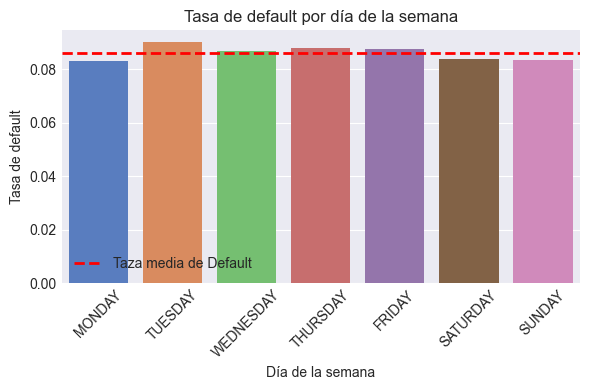

In [ ]:

# Orden correcto de los días
orden_dias = ["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY",
              "FRIDAY", "SATURDAY", "SUNDAY"]

# Agrupar por día y calcular tasa de default
tabla_weekday = (
    app_train.groupby("WEEKDAY_APPR_PROCESS_START")["TARGET"]
    .mean()
    .reset_index()
    .rename(columns={"TARGET": "tasa_default"})
)

# Convertir a categoría ordenada
tabla_weekday["WEEKDAY_APPR_PROCESS_START"] = pd.Categorical(
    tabla_weekday["WEEKDAY_APPR_PROCESS_START"],
    categories=orden_dias,
    ordered=True
)

# Ordenar según el orden definido
tabla_weekday = tabla_weekday.sort_values("WEEKDAY_APPR_PROCESS_START")

# Calcular la media general de la tasa de default
media_default = tabla_weekday["tasa_default"].mean()

# Gráfico
plt.figure(figsize=(9,5))
ax = sns.barplot(
    data=tabla_weekday,
    x="WEEKDAY_APPR_PROCESS_START",
    y="tasa_default",
    palette="muted"
)

# Línea horizontal con la media
plt.axhline(media_default, color="red", linestyle="--", linewidth=2, label=f"Taza media de Default")

plt.title("Tasa de default por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Tasa de default")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


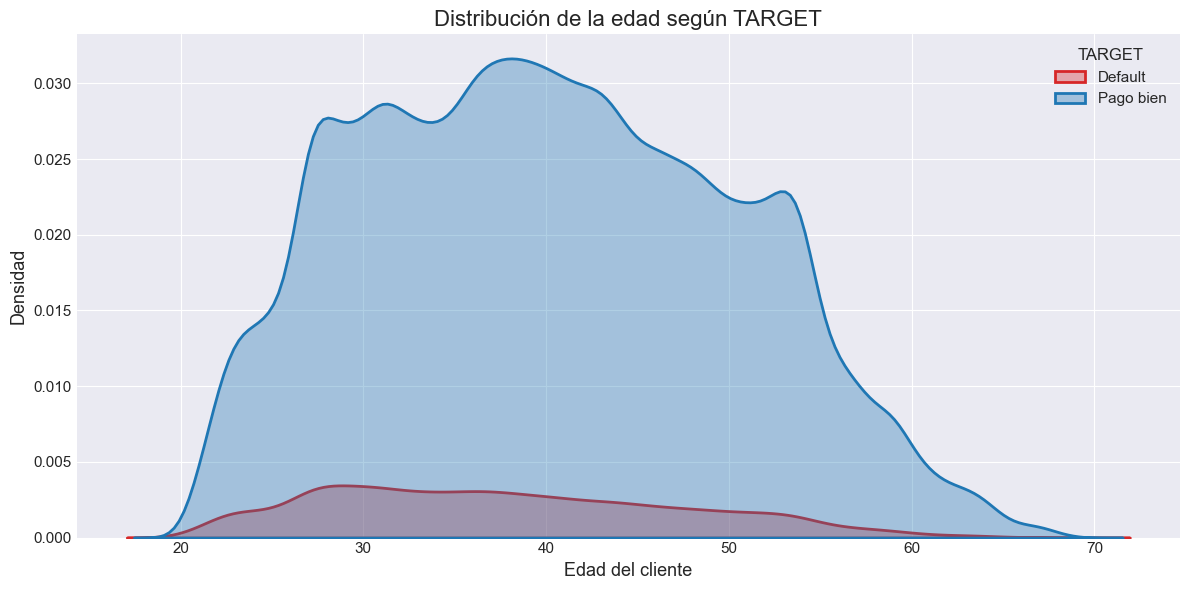

In [ ]:

# Crear variable AGE
app_train["AGE"] = (-app_train["DAYS_BIRTH"] / 365).astype(int)

plt.figure(figsize=(12,6))

sns.kdeplot(
    data=app_train,
    x="AGE",
    hue="TARGET",
    fill=True,
    alpha=0.35,            # Transparencia más suave
    linewidth=2,           # Líneas más definidas
    palette=["#1f77b4", "#d62728"]  # Colores personalizados
)


# Títulos y etiquetas
plt.title("Distribución de la edad según TARGET", fontsize=16)
plt.xlabel("Edad del cliente", fontsize=13)
plt.ylabel("Densidad", fontsize=13)

# Ajustes estéticos
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(
    title="TARGET",
    labels=["Default", "Pago bien"],
    fontsize=11,
    title_fontsize=12
)
sns.despine()
plt.tight_layout()
plt.show()



C:\Users\Agu\AppData\Local\Temp\ipykernel_26904\471446433.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=tabla_gender, x="CODE_GENDER", y="tasa_default", palette=["#d62728", "#1f77b4"])


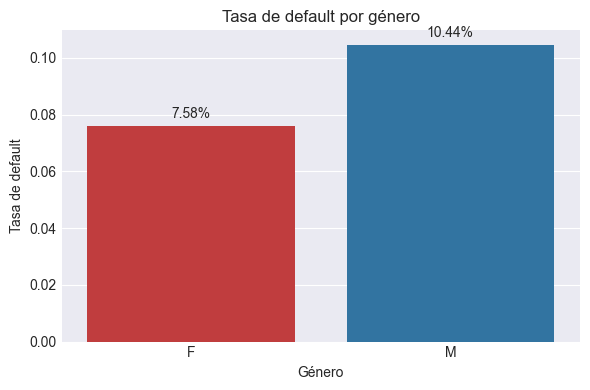

In [ ]:

# Filtrar solo F y M
df_gender = app_train[app_train["CODE_GENDER"].isin(["F", "M"])]

# Agrupar por género y calcular tasa de default
tabla_gender = (
    df_gender.groupby("CODE_GENDER")["TARGET"]
    .mean()
    .reset_index()
    .rename(columns={"TARGET": "tasa_default"})
)

plt.figure(figsize=(6,4))
ax = sns.barplot(data=tabla_gender, x="CODE_GENDER", y="tasa_default", palette=["#d62728", "#1f77b4"])

plt.title("Tasa de default por género")
plt.xlabel("Género")
plt.ylabel("Tasa de default")

# Anotar porcentaje arriba de cada barra
for i, row in tabla_gender.iterrows():
    ax.text(i, row["tasa_default"] + 0.002, f"{row['tasa_default']:.2%}",
            ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()



C:\Users\Agu\AppData\Local\Temp\ipykernel_26904\2856578018.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=app_train, x="TARGET", y="AMT_INCOME_K", palette="Set2")


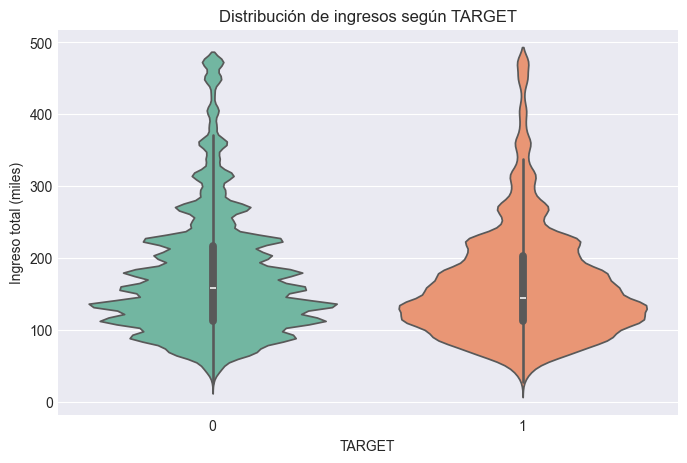

In [ ]:
app_train["AMT_INCOME_K"] = app_train["AMT_INCOME_TOTAL"] / 1000

plt.figure(figsize=(8,5))
sns.violinplot(data=app_train, x="TARGET", y="AMT_INCOME_K", palette="Set2")

plt.title("Distribución de ingresos según TARGET")
plt.xlabel("TARGET")
plt.ylabel("Ingreso total (miles)")
plt.show()


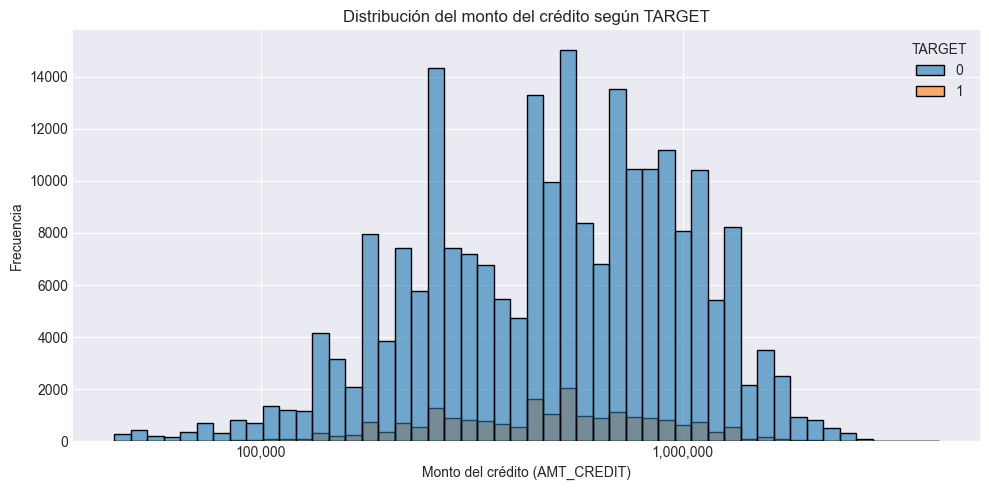

In [ ]:

import matplotlib.ticker as ticker

plt.figure(figsize=(10,5))

sns.histplot(
    data=app_train,
    x="AMT_CREDIT",
    hue="TARGET",
    hue_order=[0, 1],                 # orden explícito: primero 0, luego 1
    bins=50,
    stat="count",                     # frecuencia absoluta
    log_scale=(True, False),          # log solo en eje X
    multiple="layer",                 # no apila, solo superpone
    palette={0: "#1f77b4", 1: "#ff7f0e"},  # 0 → azul, 1 → naranja
    alpha=0.6
)

# Eje X con montos legibles
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.title("Distribución del monto del crédito según TARGET")
plt.xlabel("Monto del crédito (AMT_CREDIT)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

